In [25]:
# 1-1
# 請使用資料讀取方式，將附件中的csv檔(wine.csv)讀取到python的DataFrame
import pandas as pd
import numpy as np
data_wine = pd.read_csv("wine.csv")
data_wine

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [26]:
# 1-1
# 並秀出前五筆資料
data_wine.head(5)

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [27]:
# 1-2
# 接著將13個檢驗項目同時放入X變數，Y變數為紅酒的分類(Target)
# 請使用sklearn中的函式把X、Y變數分為training及test datasets。
# 其中，training的資料占75%、test 25%，並設定 Random_state = 5
X = data_wine.iloc[:, 1:14]
y = data_wine.iloc[:, 0]

In [28]:
# 1-2
# 並秀出 X_train的前五筆資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=5) 
X_train.head(5) 

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD of diluted wines,Proline
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
50,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150
163,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
12,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
97,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428


In [29]:
# 1-3
# 請載入決策樹函式，criterion 使用 Gini impurity (其他參數為預設值)，使用train dataset訓練此模型。
# 再利用所建構的決策樹模型針對 test dataset 進行分類，並與實際分類結果作比對，印出比對後的錯誤個數。
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'gini', max_depth =3, random_state=0)
tree.fit(X_train,y_train)
error = 0
for i, v in enumerate(tree.predict(X_test)):
    if v!= y_test.values[i]:
        print(i,v)
        error+=1
print(error)

9 2
17 2
39 1
41 3
4


In [30]:
# 1-4
# 請計算針對test dataset分類結果的正確率(Accuracy)
# 請顯示至小數點第四位。
accuracy = tree.score(X_test,y_test)
print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.9111


In [31]:
# 1-5
# 若有瓶新的紅酒，蒐集其13項特徵分別為
# [1.51, 1.73, 1.98, 20.15, 85, 2.2, 1.92, .32, 1.48, 2.94, 1, 3.57, 172]
# 請用上述所建立的決策樹分類器對此紅酒進行分類(第1類、第2類或第3類？)
x2 = np.array(['1.51','1.73','1.98','20.15','85','2.2','1.92','0.32','1.48','2.94','1','3.57','172']).reshape((1, -1))
tree.predict(x2)
print('紅酒類別:',tree.predict(x2))                           

紅酒類別: [2]


In [32]:
# 2-1 
# 載入模組
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# 2-1
# 請使用資料讀取方式，將附件中的Excel檔(income.xlsx)讀取到 python 的 DataFrame，並秀出前五筆資料
data_income = pd.read_excel("income.xlsx")
data_income.head(5)

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


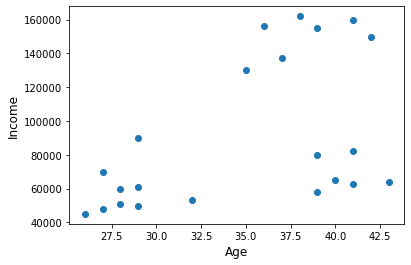

In [34]:
# 2-2
# 請以資料中的 Age 為 X 座標，Income 為 Y 座標，繪製散佈圖 (Scatter)
# 並請標示 X 軸名稱 (xlabel) 為「Age」，Y 軸名稱 (ylabel) 為「Income」
X = data_income["Age"]
Y = data_income["Income"]
plt.scatter(X, Y)
plt.xlabel("Age", fontsize = 12)
plt.ylabel("Income", fontsize = 12)
plt.show()

In [35]:
# 2-3
# 使用 KMean法 針對原始資料 (Age 與 Income) 進行分群，
# 請設定群集數目為 3、random_state 為 0 (其他參數不須設定)。
from sklearn.cluster import KMeans
df_income = data_income.iloc[:, [1,2]]
cluster = KMeans(n_clusters = 3, random_state = 0, n_jobs = -1) # n_clusters: 決定分幾群 , n_jobs=-1: 使用電腦所有核心做計算
model = cluster.fit(df_income)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [36]:
# 2-4
# 請在原匯入的 DataFrame 之最後加上一欄 (column) 呈現各資料點的分群結果，
# 同時設定 column 名稱為「cluster」，並秀出前五筆資料
data_income['cluster'] = model.labels_
data_income.head(5)                 

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


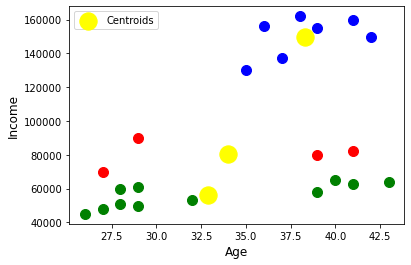

In [37]:
# 2-5
# 請將分好的3群，繪製在散佈圖上，請以不同顏色標示各分群。同時將3群的中心點標示在圖形上
# 並請標示X軸名稱(xlabel)為「Age」，Y軸名稱(ylabel)為「Income」

y_kmeans = kmeans.fit_predict(df_income)
plt.scatter(data_income[data_income["cluster"]==2]["Age"], data_income[data_income["cluster"]==2]["Income"], s = 100, c = 'red')
plt.scatter(data_income[data_income["cluster"]==1]["Age"], data_income[data_income["cluster"]==1]["Income"], s = 100, c = 'blue')
plt.scatter(data_income[data_income["cluster"]==0]["Age"], data_income[data_income["cluster"]==0]["Income"], s = 100, c = 'green')
plt.scatter(cluster.cluster_centers_[:, 0],  cluster.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Income', fontsize = 12)
plt.legend()
plt.show()  

In [38]:
# 2-6
# 請以最小-最大的標準化方法，分別針對 Age 與 Income 進行標準化。
# 並秀出標準化的前五筆資料
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
MinMax_df = data_income
MinMax_df = MinMax_df.drop(columns = ["cluster"], axis = 1)
MinMax_df.iloc[:,1:3] = min_max.fit_transform(MinMax_df.iloc[:,1:3])
MinMax_df.head(5)  

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [39]:
# 2-7
# 請使用 KMean法 針對最小-最大的標準化後的資料(標準化後的Age與Income)進行分群，
# 同樣設定群集數目為 3、random_state 為 0 (其他參數不須設定)
cluster = KMeans(n_clusters=3, random_state=0)
MMdf = MinMax_df.iloc[:,[1,2]]
model = cluster.fit(MMdf)
MinMax_df['cluster'] = model.labels_    

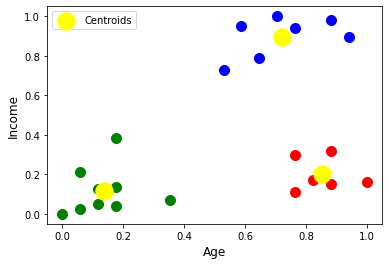

In [40]:
# 2-8
# 同樣將以標準化資料所分好的3群，繪製在散佈圖上，請以不同顏色標示各分群。
# 同時將3群的中心點標示在圖形上，並請標示X軸名稱(xlabel)為「Age」，Y軸名稱(ylabel)為「Income」
y_kmeans = cluster.fit_predict(MMdf)

plt.scatter(MinMax_df[MinMax_df["cluster"]==2]["Age"], MinMax_df[MinMax_df["cluster"]==2]["Income"], s = 100, c = 'red')
plt.scatter(MinMax_df[MinMax_df["cluster"]==1]["Age"], MinMax_df[MinMax_df["cluster"]==1]["Income"], s = 100, c = 'blue')
plt.scatter(MinMax_df[MinMax_df["cluster"]==0]["Age"], MinMax_df[MinMax_df["cluster"]==0]["Income"], s = 100, c = 'green')
plt.scatter(cluster.cluster_centers_[:, 0],  cluster.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('Age' , fontsize = 12)
plt.ylabel('Income', fontsize = 12)
plt.legend()
plt.show()    

In [41]:
# 2-9
# 請以圖形或分群結果判斷在此案例下，「未經標準化」與「經過標準化後」的分群結果哪一個比較好？
"經過標準化後比較好"

'經過標準化後比較好'

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in ve

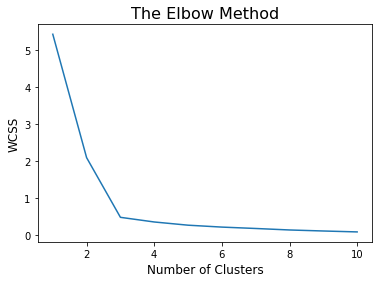

In [42]:
# 2-10
# 請以上課所教的Elbow Method，透過迴圈方式，將標準化後的資料設定不同群集(請設定1~10群)，
# 畫出群集數與wcss的圖形，請以轉折點判斷上述分群數設定為3是否合理？
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state=0, n_jobs=-1)
    kmeans.fit(MMdf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method', fontsize = 16)
plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('WCSS', fontsize = 12)
plt.show()    